# TDA聚类
TDA-based association analysis between reaction conditions and yield

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
matplotlib.rc('font', family='Arial Unicode MS',)  ## 解决图上文字乱码的问题

In [2]:
from tda import TDA

In [10]:
data= np.loadtxt(open("x.csv","rb"),delimiter=",",skiprows=1)
y = np.loadtxt(open("y.csv","rb"),delimiter=",",skiprows=1)

In [4]:
def distance(a, b):
    s = sum( (i-j) **2 for i, j in zip(a, b))
    return math.sqrt(s)
def L_inf(n, i):
    L = 0
    for j in range(len(n)):
        dist = distance(n[i], n[j])
        if dist > L:
            L = dist
    return L

In [11]:
data.shape

(3955, 21)

In [12]:
t = TDA(distance, [(L_inf, 15,0.6)],5)
t.fit(data)
t.binums, len(t.clusters)

485
861
931
875
952
986
826
537
925
207
997
64
327
224
112
277
252


([17], 38)

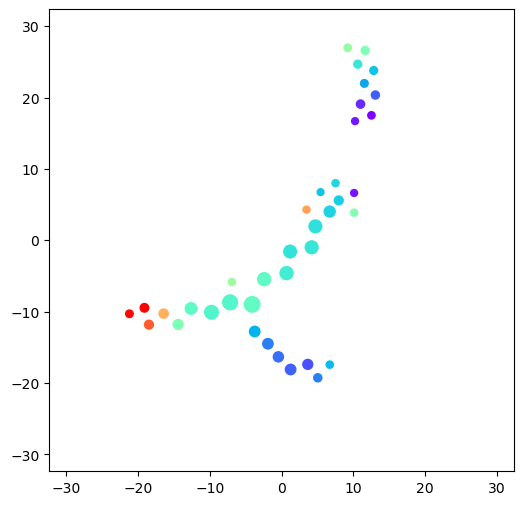

In [13]:
t.dye(lambda d, i: y[i], figsize=6, Pk=1)
plt.savefig('tda.tif', dpi=300, bbox_inches='tight')
plt.show()

# 多因素方差分析
(Interaction-based association analysis between reaction conditions and yield：反应条件与产率的交互作用分析）

In [24]:
data= np.loadtxt(open("xjiaohu.csv","rb"),delimiter=",",skiprows=1)
df = pd.DataFrame(data, columns = ['Aryl', 'Ligand', 'y'])
df.head()

,Aryl,Ligand,y
0,1.0,1.0,10.657812
1,2.0,1.0,14.747896
2,3.0,1.0,18.278686
3,4.0,1.0,2.475058
4,5.0,1.0,6.119058


In [32]:
df1 = pd.DataFrame()
data_list = []
for i in df.Ligand.unique():
    for j in df.Aryl.unique():
        data = df[(df.Ligand == i)&(df.Aryl == j)]['y'].values
        data_list.append(data)
        df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
df1 = df1.T
df1


C:\Users\86173\AppData\Local\Temp\ipykernel_41612\3286453798.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\86173\AppData\Local\Temp\ipykernel_41612\3286453798.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\86173\AppData\Local\Temp\ipykernel_41612\3286453798.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\86173\AppData\Local\Temp\ipykernel_41612\3286453798.py:7: FutureWarning: The frame.append method is deprecated and will be r

1.0                                                                  \
         1.0        2.0        3.0       4.0        5.0        6.0       7.0    
0   10.657812  14.747896  18.278686  2.475058   6.119058   5.449924  7.802080   
1   14.018641  30.591262  38.155736  0.456472   3.867386   7.024622  2.846164   
2   14.967396  30.286255  39.577839  0.339837   3.123062   5.140110  3.920306   
3    3.606677  35.078662  43.318146  0.000000  29.298178  37.565356  0.960810   
4    5.008761  35.088724  41.245607  0.000000  13.976947  18.895249  0.705195   
..        ...        ...        ...       ...        ...        ...       ...   
61  19.419805  32.075421  34.520652  2.069143  14.422533  22.927350  5.821778   
62  19.393443  31.159342  38.745196  1.798923   9.508785  17.339878  5.235496   
63   6.701918  15.721696  32.038390  0.000000   5.529907   6.840871  0.566846   
64  10.486013  26.298861  23.693453  0.000000   6.730455  13.418573  1.036456   
65   7.343376  26.031733  36.254548  0.000000   4.191041   6.114675  0.884951   

                                     ...        4.0                       \
         8.0        9.0        10.0  ...       6.0       7.0        8.0    
0   14.234178  15.413893   9.465696  ...  16.857023  3.595206  19.902730   
1   18.869009  25.073659  21.666586  ...  40.139694  0.576933  29.297955   
2   15.397530  22.450649  23.686174  ...  53.145239  2.173415  59.968000   
3   59.019681  70.968730  35.139527  ...  52.788484  1.112659  67.020837   
4   32.632341  31.818372  30.425439  ...  43.864265  0.000000  39.831557   
..        ...        ...        ...  ...        ...       ...        ...   
61  33.786015  37.397427  26.660409  ...  39.707634  1.666951  57.559228   
62  28.743532  53.886451  27.326365  ...  48.451711  1.342248  69.849529   
63  22.164835  31.417490  22.294112  ...  44.942111  0.000000  49.880089   
64  22.996209  37.021541  22.696595  ...  34.285455  0.526082  35.200977   
65  16.690677  31.266284  24.660061  ...  46.313988  0.553317  32.707507   

                                                                      \
         9.0        10.0       11.0       12.0       13.0       14.0   
0   25.252703  16.158511  20.643574  24.162563   7.938108  13.646554   
1   73.739939  24.606023  39.093725  65.389333   2.344713  48.307103   
2   80.978050  68.006565  84.910250  95.070201  15.223476  86.415410   
3   72.466279  55.089843  63.257594  66.283264   6.141106  54.563582   
4   78.711898  34.684950  51.683950  69.947189   1.517637  65.783746   
..        ...        ...        ...        ...        ...        ...   
61  61.437310  44.041393  53.664977  58.269037  15.287627  59.262397   
62  74.903528  78.412621  80.770356  84.701722   9.540861  61.669556   
63  61.835930  54.697975  66.428143  66.047674   0.899554  41.911559   
64  57.874167  28.171355  42.189320  54.862777   1.720185  52.962783   
65  69.618417  38.403806  57.426670  86.233157   1.440081  43.538365   

               
         15.0  
0   14.367370  
1   72.941854  
2   92.130682  
3   63.224692  
4   79.370531  
..        ...  
61  62.559565  
62  74.592318  
63  45.770461  
64  55.264663  
65  69.795902  

[66 rows x 60 columns]

In [33]:
# 查看各组数量分布
df1.count().to_frame()


0
1.0 1.0   66
    2.0   66
    3.0   66
    4.0   66
    5.0   66
    6.0   66
    7.0   66
    8.0   66
    9.0   66
    10.0  66
    11.0  66
    12.0  66
    13.0  66
    14.0  66
    15.0  66
2.0 1.0   66
    2.0   65
    3.0   65
    4.0   66
    5.0   66
    6.0   66
    7.0   64
    8.0   66
    9.0   66
    10.0  66
    11.0  66
    12.0  66
    13.0  66
    14.0  66
    15.0  66
3.0 1.0   66
    2.0   66
    3.0   66
    4.0   66
    5.0   66
    6.0   66
    7.0   66
    8.0   66
    9.0   66
    10.0  66
    11.0  66
    12.0  66
    13.0  66
    14.0  66
    15.0  65
4.0 1.0   66
    2.0   66
    3.0   66
    4.0   66
    5.0   66
    6.0   66
    7.0   66
    8.0   66
    9.0   66
    10.0  66
    11.0  66
    12.0  66
    13.0  66
    14.0  66
    15.0  66

In [34]:
df_mean = df1.mean().to_frame().unstack().round(1)
df_mean.columns = ['1', '2', '3','4','5', '6', '7','8','9', '10', '11','12','13', '14', '15']
df_mean = df_mean[['1', '2', '3','4','5', '6', '7','8','9', '10', '11','12','13', '14', '15']]
df_mean

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1.0,12.1,21.8,30.4,1.9,11.1,15.5,3.7,25.6,33.3,19.9,33.6,37.0,10.0,17.9,28.7
2.0,20.2,32.8,35.9,2.4,34.2,38.1,4.8,54.2,57.3,57.4,65.1,66.8,24.7,59.2,61.9
3.0,10.4,28.3,34.6,1.7,30.0,37.5,5.5,49.8,60.9,54.3,61.1,69.4,12.2,50.5,57.4
4.0,7.3,24.8,34.1,1.8,28.2,39.0,1.4,44.3,58.8,42.3,49.9,61.2,8.6,44.4,57.2


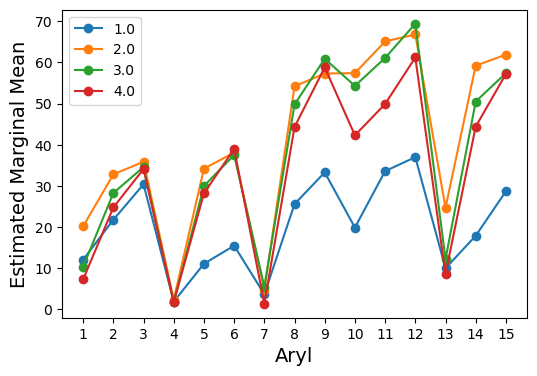

In [36]:
# 定义一个绘图函数
def draw_pics(data, feature):
    fig, ax = plt.subplots(figsize=(6, 4)) 
    for i in data.index:
        ax.plot(data.columns, data.loc[i,], label = i, marker='o')
        ax.legend()
   # ax.set_title("y")
    ax.set_xlabel(feature, fontdict={'fontsize': 14})
    ax.set_ylabel("Estimated Marginal Mean", fontdict={'fontsize': 14})
    plt.show()
# 绘制不同的性别在不同的教育程度下的均值变化
draw_pics(df_mean, 'Aryl')


# 产率预测

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import fire
from sklearn import metrics
from matplotlib import pyplot

In [ ]:
import time
start = time.time()

gbm = lgb.LGBMRegressor(reg_alpha=0.11,reg_lambda=1,min_child_samples=8,min_child_weight=0,colsample_bytree=0.75,subsample=1,
                        num_leaves=51,max_depth=12,min_split_gain=0,learning_rate=0.1,n_estimators=515)
gbm.fit(X_train, y_train)
# 测试机预测
y_pred = gbm.predict(X_test)

end = time.time()
print("循环运行时间:%.4f秒"%(end-start))

In [ ]:
from sklearn import metrics
# 评估回归性能
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

# 分层多样性抽样

In [40]:
import numpy as np
import pandas as pd
import torch
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPool1D,BatchNormalization,Activation
import matplotlib.pyplot as plt
from keras import backend as K

In [41]:
X264= np.loadtxt(open("x264.csv","rb"),delimiter=",",skiprows=1)
X3691= np.loadtxt(open("x3691.csv","rb"),delimiter=",",skiprows=1)
y264=np.loadtxt(open("y264.csv","rb"),delimiter=",",skiprows=1)
y3691=np.loadtxt(open("y3691.csv","rb"),delimiter=",",skiprows=1)

In [42]:
X264=torch.from_numpy(X264)
X3691=torch.from_numpy(X3691)

In [43]:
# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
x_training1, x_unlabeled1, y_training1, y_unlabeled1 = train_test_split(X264,y264,train_size=0.0868)
x_training2, x_unlabeled2, y_training2, y_unlabeled2 = train_test_split(X3691,y3691,train_size=0.1)

In [44]:
# 此函数用于更新Train_x
# data_var来源于相似度计算，是x_test中的数据
def upTrain_x(data_var,X):
    final_update= torch.tensor([item.detach().numpy() for item in data_var])
    return torch.cat((X,final_update),dim = 0)
    
# 用于更新train_y
## train_y = train_y + (data_var <- test_y)
def upTrain_y(data_var,Y):
    return torch.cat((Y,data_var),dim = 0)

# 用于更新test_y：
## test_y => 
##          1. test_y
##          2. data_var -> train_y
## return: (test_y,data_var)
def upTest_y(line_num,Y):
    out = np.array([],dtype='float64')
    data_var = np.array([],dtype='float64')
    for i in range(len(Y)):
        if i not in line_num:
            out = np.append(out,Y[i])
        else:
            data_var = np.append(data_var,Y[i])
    return (torch.tensor(out),torch.tensor(data_var))   

# 此函数用于更新x
# 删除x_test中的数据，不做返回，返回在相似度计算时已做
## test_x => 
##          1. test_x
##          2. data_var -> train_x
def upTest_x(line_num,X):
    out = []
    for i in range(len(X)):                
        if i not in line_num:
            out.append(X[i])
    return torch.stack(out,dim = 1).T   # 转化为torch，注意需要转至 

# 此函数用于计算训练集与测试集相似度
## x_train: 训练集的x
## x_test: 测试集的x
## return:
###       1. line_num
###       2. data_var <- x_test
def CalSim(x_train,x_test,n):
    similarity_list = []
    #line_num,data_var=[],[]
    for i in range(len(x_test)):
        s_ = torch.cosine_similarity(x_test[i],x_train, dim=-1)#计算未标记数据的与所有标记数据的相似度
        s_max = torch.max(s_).item() # 返回每一个未标记数据对应的最大相似度
        similarity_list.append(s_max) # 将最大相似度添加到相似度列表中
    df = pd.DataFrame(zip(list(enumerate(x_test)), similarity_list), columns=['index', 'similarity'])
    df_sorted = df.sort_values(by=['similarity'], ascending=True)#将最大相似度升序排列
    df_index = df_sorted['index'].values
    update_list = list(df_index[:n])#选择前10名作为候选对象
    # 将ipdate_list排序
    df2 = pd.DataFrame(update_list,columns=["num","data"])
    df2 = df2.sort_values(by=['num'], ascending=True)               #升序排列
    line_num = list(df2["num"])
    data_var = list(df2["data"])
    return (line_num,data_var)


In [45]:
def Upgrade(n,m,train_x,train_y,test_x,test_y):
    train_x_ = train_x
    train_y_ = torch.tensor(train_y)
    test_x_ = test_x
    test_y_ = torch.tensor(test_y)
    count = 0
    while count < n:
        print("Loop <{}> |".format(count),end="\t")
        out_sim = CalSim(train_x_,test_x_,m)
        # 更新train_x_
        train_x_ = upTrain_x(out_sim[1],train_x_)
        print("New train_x = ({},{})\t".format(train_x_.shape[0],train_x_.shape[1]),end="\t")
        ## 更新test_x_
        test_x_ = upTest_x(out_sim[0],test_x_)
        print("New test_x = ({},{})\t".format(test_x_.shape[0],test_x_.shape[1]),end="\t")
        ## 更新test_y_
        out_uptest_y = upTest_y(out_sim[0],test_y_)
        test_y_ = out_uptest_y[0]
        print("New test_y_ = ({},)\t".format(test_y_.shape[0]),end="\t")
        ## 更新train_y_
        #print(train_y_)
        train_y_ = upTrain_y(out_uptest_y[1],train_y_)
        print("New train_y_ = ({},)\t".format(train_y_.shape[0]),end="\n")
        count += 1
    #return (train_x_,train_y_,test_x_,test_y_)                                      # 返回的都是tensor
    return (train_x_.numpy(),train_y_.numpy(),test_x_.numpy(),test_y_.numpy())       # 将所有的转化为array


In [46]:
a = Upgrade(6,27,x_training1, y_training1,x_unlabeled1,y_unlabeled1)
b = Upgrade(6,369,x_training2, y_training2,x_unlabeled2,y_unlabeled2)

Loop <0> |	New train_x = (50,120)		New test_x = (215,120)		New test_y_ = (215,)		New train_y_ = (50,)	
Loop <1> |	New train_x = (77,120)		New test_x = (188,120)		New test_y_ = (188,)		New train_y_ = (77,)	
Loop <2> |	New train_x = (104,120)		New test_x = (161,120)		New test_y_ = (161,)		New train_y_ = (104,)	
Loop <3> |	New train_x = (131,120)		New test_x = (134,120)		New test_y_ = (134,)		New train_y_ = (131,)	
Loop <4> |	New train_x = (158,120)		New test_x = (107,120)		New test_y_ = (107,)		New train_y_ = (158,)	
Loop <5> |	New train_x = (185,120)		New test_x = (80,120)		New test_y_ = (80,)		New train_y_ = (185,)	
Loop <0> |	New train_x = (738,120)		New test_x = (2952,120)		New test_y_ = (2952,)		New train_y_ = (738,)	
Loop <1> |	New train_x = (1107,120)		New test_x = (2583,120)		New test_y_ = (2583,)		New train_y_ = (1107,)	
Loop <2> |	New train_x = (1476,120)		New test_x = (2214,120)		New test_y_ = (2214,)		New train_y_ = (1476,)	
Loop <3> |	New train_x = (1845,120)		New test_x = (

In [47]:
X_train=np.concatenate((a[0],b[0]),axis=0)
X_test=np.concatenate((a[2],b[2]),axis=0)
y_train=np.concatenate((a[1],b[1]),axis=0)
y_test=np.concatenate((a[3],b[3]),axis=0)